# Intrusion Detection Data Generation with GAN

## Install Dependencies and prepare Train, Test Sets

In [1]:
!pip install ctgan
!pip install table_evaluator
!pip install numpy
!pip install gdown
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from table_evaluator import TableEvaluator

IPython not installed.


In [14]:
!gdown 1y0zyTfNcxRMJIsVEw_I09OTzTpl5N5fb

Downloading...
From: https://drive.google.com/uc?id=1y0zyTfNcxRMJIsVEw_I09OTzTpl5N5fb
To: /Users/tarunannapareddy/Desktop/code/CTGAN/mainSimulationAccessTraces.csv
100%|██████████████████████████████████████| 60.8M/60.8M [00:03<00:00, 18.1MB/s]


In [2]:
data = pd.read_csv('./mainSimulationAccessTraces2.csv')
# Split the data into 80% train and 20% remaining (test)
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)

# Split the remaining 20% into 50% validation and 50% test (10% each of total data)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)
categorical_columns = ['sourceID', 'sourceAddress', 'sourceType', 'sourceLocation',
                       'destinationServiceAddress', 'destinationServiceType', 'destinationLocation',
                       'accessedNodeAddress', 'accessedNodeType', 'operation']
print(train_data.dtypes)

sourceID                      object
sourceAddress                 object
sourceType                    object
sourceLocation                object
destinationServiceAddress     object
destinationServiceType        object
destinationLocation           object
accessedNodeAddress           object
accessedNodeType              object
operation                     object
value                        float64
timestamp                    float64
sevenWayLabel                  int64
twoWayLabel                    int64
dtype: object


## Train and Save GAN Model

In [26]:
# Ensure numerical columns are properly converted
train_data['value'] = pd.to_numeric(train_data['value'], errors='coerce')
#train_data['timestamp'] = pd.to_datetime(train_data['timestamp'], unit='ms')
#train_data['timestamp'] = train_data['timestamp'].astype(int) / 10**9

# Drop or handle missing values
train_data = train_data.dropna()

In [17]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(train_data, categorical_columns, epochs = 500)

Gen. (-0.13) | Discrim. (0.11): 100%|██████████| 500/500 [16:38:30<00:00, 119.82s/it]     


In [18]:
with open('ctgan_model2.pkl', 'wb') as f:
    pickle.dump(ctgan, f)

## Load and Run Saved GAN Model

In [3]:
with open('ctgan_model2.pkl', 'rb') as f:
    loaded_ctgan = pickle.load(f)

Note : In the below section we need to uncomment the timestamp conversion when creating dataset for training. 

In [6]:
samples = loaded_ctgan.sample(1000)
samples
#samples['timestamp'] = (samples['timestamp'] * 10**9).astype(int) // 10**6

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,sevenWayLabel,twoWayLabel
0,lightcontrol11,/agent11/lightcontrol11,/lightControler,Watterroom,/agent11/movement11,/movementSensor,Watterroom,/agent11/movement11/movement,/derived/boolean,read,-1.164098e+07,1.520000e+09,0,0
1,doorlock4,/agent4/doorlock4,/doorLockService,Kitchen,/agent25/heatingcontrol4,/thermostat,room_6,/agent25/heatingcontrol4,/thermostat,write,-1.485885e+07,1.520000e+09,0,1
2,tempin4,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,write,2.111037e+07,1.520000e+09,0,0
3,battery5,/agent12/battery5,/batteryService,Entrance,/agent12/battery5,/batteryService,Entrance,/agent12/battery5/charge,/basic/number,read,-1.833573e+06,1.520000e+09,0,0
4,battery3,/agent4/battery3,/batteryService,Kitchen,/agent4/battery3,/batteryService,Kitchen,/agent4/battery3/charging,/basic/text,read,-5.861782e+07,1.520000e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,washingmachine1,/agent6/washingmachine1,/washingService,Bathroom,/agent5/battery2,/batteryService,Garage,/agent5/battery2/charge,/basic/number,write,2.219860e+07,1.520000e+09,0,0
996,washingmachine1,/agent6/washingmachine1,/washingService,Bathroom,/agent5/battery1,/batteryService,Garage,/agent5/battery1/charge,/basic/number,read,-1.473635e+07,1.520000e+09,0,0
997,lightcontrol24,/agent24/lightcontrol24,/lightControler,room_5,/agent24/movement24,/movementSensor,room_5,/agent24/movement24/movement,/derived/boolean,read,2.807045e+07,1.520000e+09,0,0
998,tempin20,/agent20/tempin20,/sensorService,room_1,/agent20/tempin20,/sensorService,room_1,/agent20/tempin20,/sensorService,write,8.673757e+06,1.520000e+09,0,0


(286352, 14) (35795, 14)


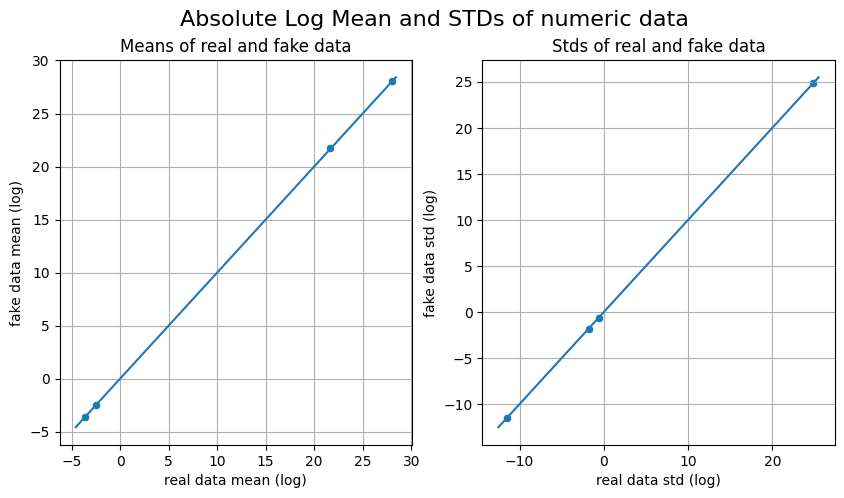

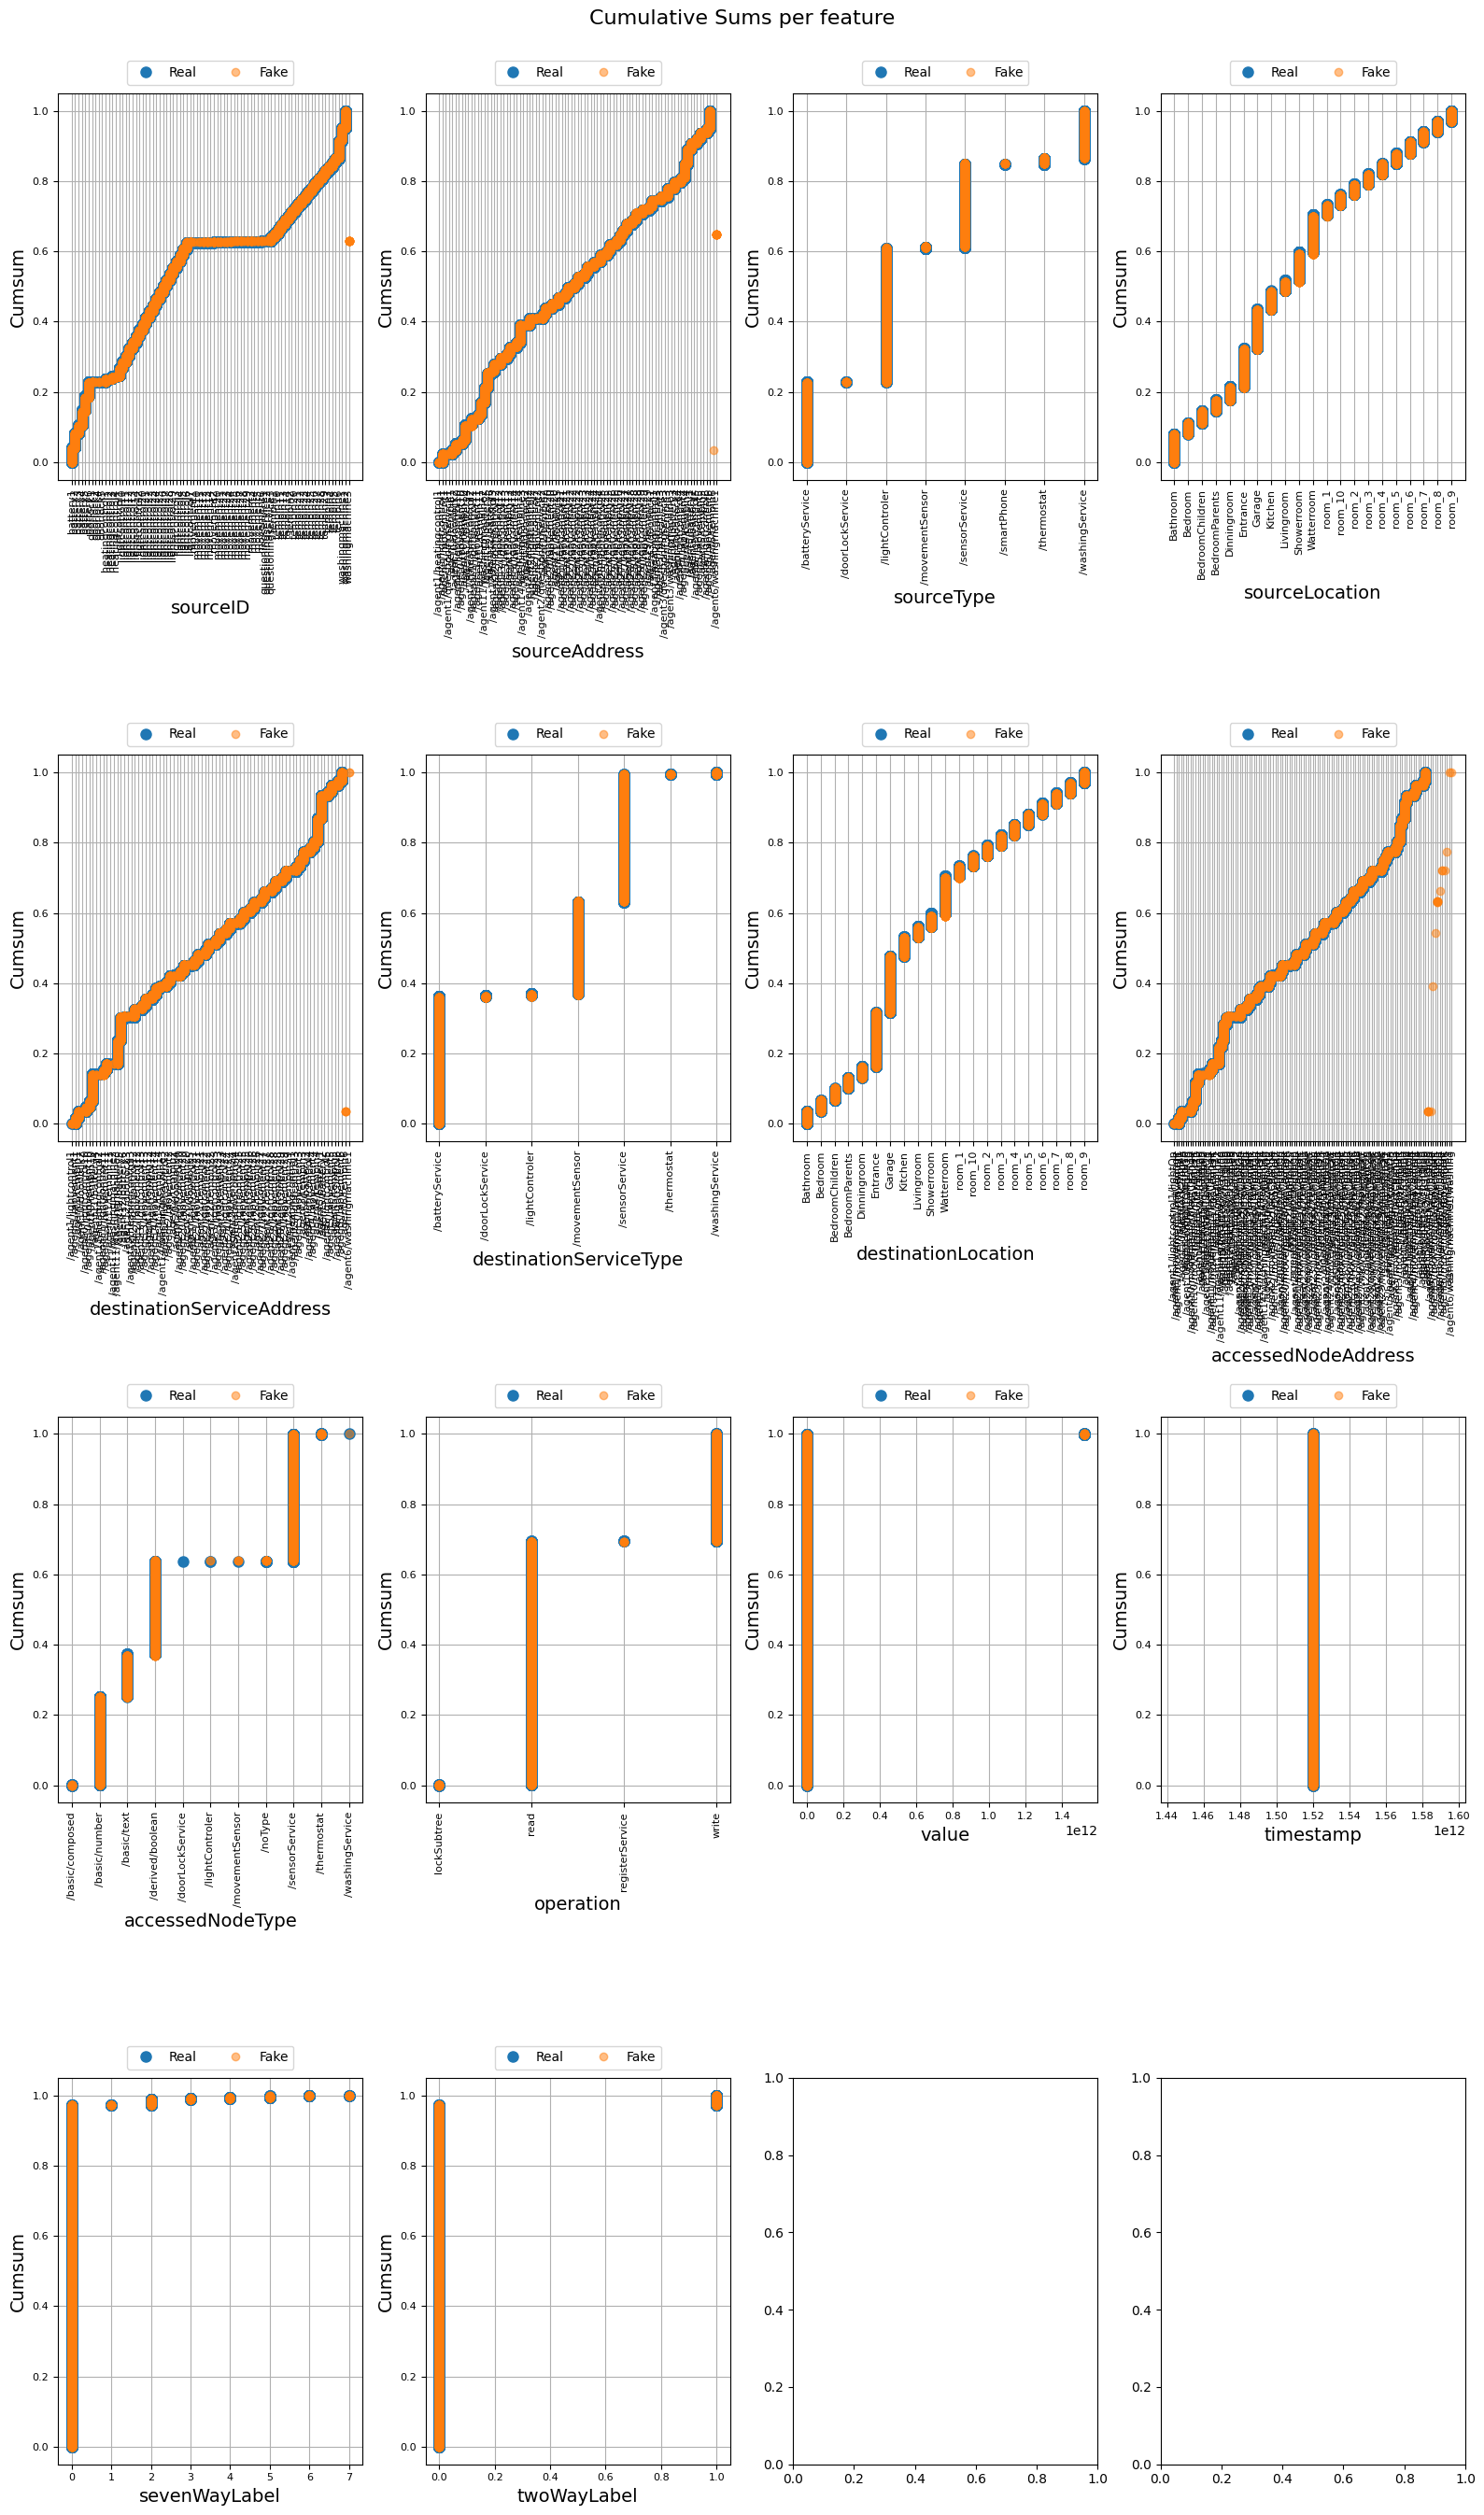

/opt/homebrew/anaconda3/envs/ctgan/lib/python3.8/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/opt/homebrew/anaconda3/envs/ctgan/lib/python3.8/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/opt/homebrew/anaconda3/envs/ctgan/lib/python3.8/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/opt/homebrew/anaconda3/envs/ctgan/lib/python3.8/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/opt/homebre

: 

In [ ]:
print(train_data.shape, test_data.shape)
#train_data['value'] = pd.to_numeric(test_data['value'], errors='coerce')
#test_data['timestamp'] = pd.to_datetime(test_data['timestamp'], unit='ms')
#test_data['timestamp'] = test_data['timestamp'].astype(int) / 10**9

table_evaluator =  TableEvaluator(test_data, train_data, cat_cols= categorical_columns)

table_evaluator.visual_evaluation()